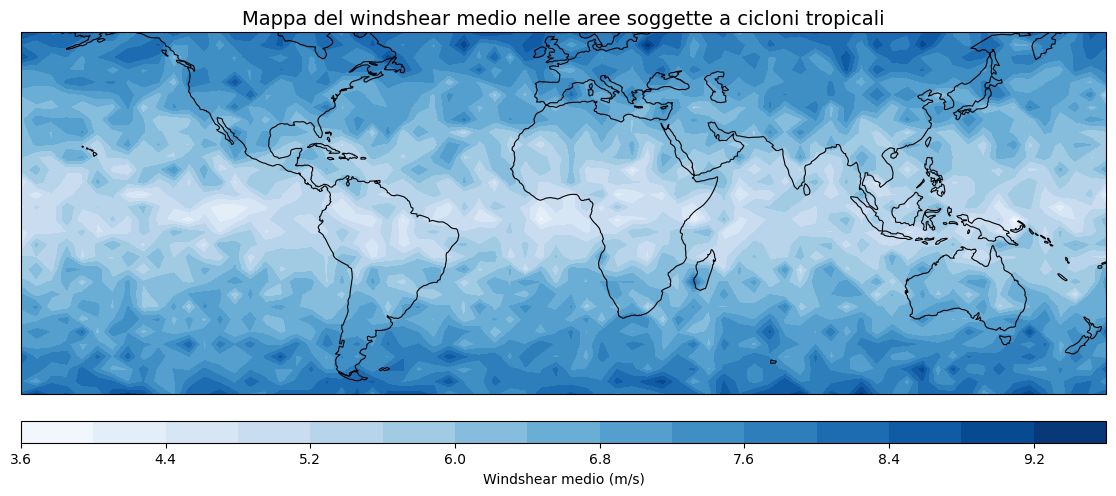

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv("..//data//windshear_global.csv")

lons = sorted(df["lon"].unique())
lats = sorted(df["lat"].unique())
lon_grid, lat_grid = np.meshgrid(lons, lats)
windshear = df.pivot(index="lat", columns="lon", values="windshear").values

fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([df["lon"].min(), df["lon"].max(),
               df["lat"].min(), df["lat"].max()],
              crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

cs = ax.contourf(
    lon_grid, lat_grid, windshear,
    levels=15, cmap="Blues", transform=ccrs.PlateCarree()
)

cbar = plt.colorbar(cs, orientation="horizontal", pad=0.05, aspect=50)
cbar.set_label("Windshear medio (m/s)")
plt.title("Mappa del windshear medio nelle aree soggette a cicloni tropicali", fontsize=14)
plt.show()
